# Titanic  Survived

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

%matplotlib inline
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

### Read Files

In [2]:
titanic = pd.read_csv('../titanic_train.csv')
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_test = pd.read_csv('../titanic_test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
print(titanic.shape , titanic_test.shape)

(891, 12) (418, 11)


In [121]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# EDA

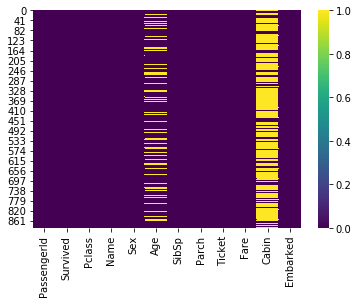

In [123]:
#train set
sns.heatmap(titanic.isnull(),cmap='viridis')

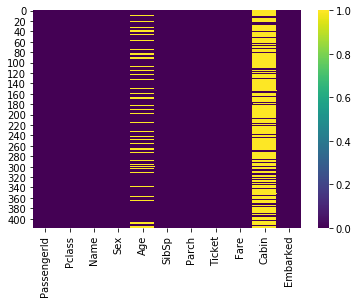

In [124]:
#test set
sns.heatmap(titanic_test.isnull(),cmap='viridis')

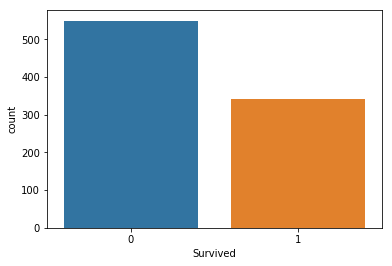

In [125]:
sns.countplot(x='Survived', data=titanic)

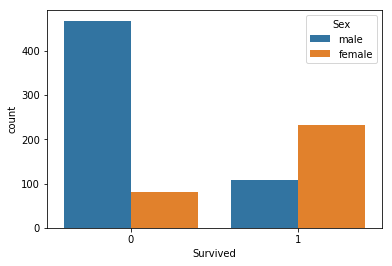

In [126]:
sns.countplot(x='Survived', data=titanic, hue='Sex')

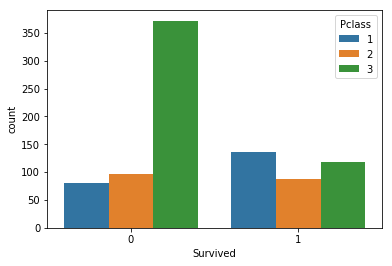

In [127]:
sns.countplot(x='Survived', data=titanic, hue='Pclass')

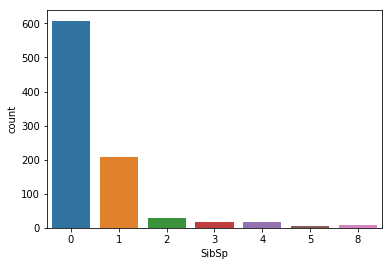

In [128]:
sns.countplot(x='SibSp',data=titanic)

In [129]:
titanic['Fare'].iplot(kind='hist',bins=40)

# Correlation of Titanic based on Survived 

In [130]:
titanic.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## Check the Null value in Embarked column

In [131]:
empty_embarked = titanic[titanic['Embarked'].isnull()]
#empty_embarked_test = test[test['Embarked'].isnull()]

## Fill Value in Embarked with 'C' 

In [132]:
#fill the missing value
titanic['Embarked'] = titanic['Embarked'].fillna('C')

## Check Fare of Test is null ?

In [133]:
print(titanic_test.describe())
titanic_test[titanic_test['Fare'].isnull()]
print(titanic_test.shape)

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
(418, 11)


## Fill the missing value of Fare  

In [134]:
#fill that Fare column
def missing_fare(df):
    median_fare = df[(df['Pclass']==3) & (df['Embarked']=='S')]['Fare'].median()
    df['Fare'] = df['Fare'].fillna(median_fare)
    return df


titanic_test = missing_fare(titanic_test)
print(titanic_test.shape)

(418, 11)


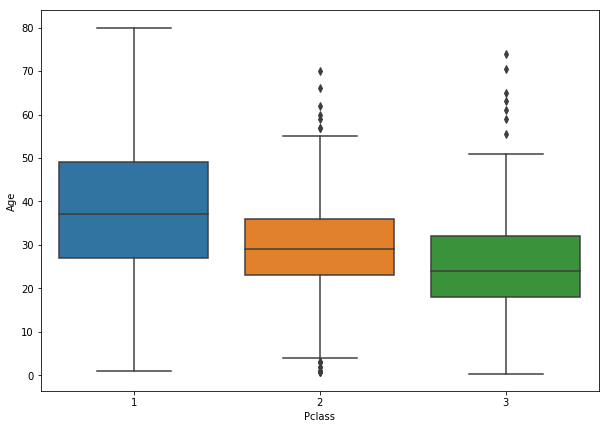

In [135]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

## Fill the age in Train and test set

In [136]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [137]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age,axis=1)
print(titanic_test.shape)

(418, 11)


In [145]:
print(titanic_test.isnull().shape)
print(titanic.isnull().shape)

#or
#sns.heatmap(titanic_test.isnull())
#sns.heatmap(titanic.isnull())


(418, 11)
(891, 12)


## Cabin column,there are too much missing values & Name column,Text column so we will drop it

In [146]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Name',axis=1,inplace=True)
print(titanic.shape)

(891, 10)


In [147]:
titanic_test.drop('Cabin',axis=1,inplace=True)
titanic_test.drop('Name',axis=1,inplace=True)
print(titanic_test.shape)

(418, 9)


In [148]:
print(titanic_test.describe())
titanic_test.head()

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   29.321770    0.447368    0.392344   35.561214
std     120.810458    0.841838   12.904065    0.896760    0.981429   55.856789
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   25.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   36.375000    1.000000    0.000000   31.471875
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S


In [149]:
print(titanic.describe())
titanic.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.066409    0.523008   
std     257.353842    0.486592    0.836071   13.244532    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [151]:
pd.get_dummies(titanic['Sex'])
pd.get_dummies(titanic_test['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


## Count Family-size based on SibSp + Parch + 1 create a new Column

In [152]:
#how big ur family ?
titanic['FamilySize'] = titanic["SibSp"] + titanic["Parch"] + 1
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1
print(titanic.describe())
print(titanic_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.066409    0.523008   
std     257.353842    0.486592    0.836071   13.244532    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602  
std      0.806057   49.693429    1.613459  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.910400    1.000000  
50%      0.000000   14.454200    1.000000  
75%      0.000000   31.000000    2.000000  
max      6.000000

In [153]:
titanic.loc[titanic["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic.loc[(titanic["FamilySize"] > 1)  &  (titanic["FamilySize"] < 5) , "FsizeD"] = 'small'
titanic.loc[titanic["FamilySize"] >4, "FsizeD"] = 'large'

titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'
print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())

['small' 'singleton' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


## Worked on Ticket Column

In [154]:
#for Train
titanic['TicketNumber'] = titanic['Ticket'].str.extract('(\d{2,})',expand=True) #this is object type
#titanic.info()
titanic["TicketNumber"] = titanic["TicketNumber"].apply(pd.to_numeric) # this is float type
#titanic.info()



#for Test
titanic_test['TicketNumber'] = titanic_test['Ticket'].str.extract('(\d{2,})',expand=True) #this is object type
#titanic_test.info()
titanic_test["TicketNumber"] = titanic_test["TicketNumber"].apply(pd.to_numeric) # this is float type
#titanic_test.info()


In [155]:
titanic[titanic["TicketNumber"].isnull()] # one value empty in ticketnumber 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FsizeD,TicketNumber
179,180,0,3,male,36.0,0,0,LINE,0.0,S,1,singleton,NaN
271,272,1,3,male,25.0,0,0,LINE,0.0,S,1,singleton,NaN
302,303,0,3,male,19.0,0,0,LINE,0.0,S,1,singleton,NaN
597,598,0,3,male,49.0,0,0,LINE,0.0,S,1,singleton,NaN
772,773,0,2,female,57.0,0,0,S.O./P.P. 3,10.5,S,1,singleton,NaN
841,842,0,2,male,16.0,0,0,S.O./P.P. 3,10.5,S,1,singleton,NaN


In [156]:
titanic_test[titanic_test["TicketNumber"].isnull()]    # no empty in test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FsizeD,TicketNumber
186,1078,2,female,21.0,0,1,S.O./P.P. 2,21.0,S,2,small,NaN
302,1194,2,male,43.0,0,1,S.O./P.P. 2,21.0,S,2,small,NaN


In [157]:
titanic.TicketNumber.fillna(titanic["TicketNumber"].median(), inplace=True)
titanic_test.TicketNumber.fillna(titanic_test["TicketNumber"].median(), inplace=True)

In [158]:
titanic.drop('Ticket',axis=1,inplace=True)
titanic_test.drop('Ticket',axis=1,inplace=True)

## Convert Categorical variables into Numerical ones

In [163]:
print(titanic.shape)
#titanic_test.notnull().shape
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FsizeD,TicketNumber
0,1,0,3,male,22.0,1,0,7.2500,S,2,small,21171.0
1,2,1,1,female,38.0,1,0,71.2833,C,2,small,17599.0
2,3,1,3,female,26.0,0,0,7.9250,S,1,singleton,3101282.0
3,4,1,1,female,35.0,1,0,53.1000,S,2,small,113803.0
4,5,0,3,male,35.0,0,0,8.0500,S,1,singleton,373450.0


In [164]:
print(titanic_test.shape)
#titanic_test.notnull().shape
titanic_test.head()

(418, 11)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FsizeD,TicketNumber
0,892,3,male,34.5,0,0,7.8292,Q,1,singleton,330911.0
1,893,3,female,47.0,1,0,7.0000,S,2,small,363272.0
2,894,2,male,62.0,0,0,9.6875,Q,1,singleton,240276.0
3,895,3,male,27.0,0,0,8.6625,S,1,singleton,315154.0
4,896,3,female,22.0,1,1,12.2875,S,3,small,3101298.0


## Encoding of Text Data Use of LabelEncoder and OneHotEncoder 

In [169]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [177]:
labelenc = LabelEncoder()
var = ['Sex','Embarked','FsizeD']

for i in var:
    titanic[i] = labelenc.fit_transform(titanic[i])
    titanic_test[i] = labelenc.fit_transform(titanic_test[i])

print(titanic.describe())    
titanic.head()

## Correlation of features with target 

In [171]:
titanic.corr()['Survived']

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.047255
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
FamilySize      0.016639
FsizeD          0.283810
TicketNumber   -0.096161
Name: Survived, dtype: float64

## Logistic Regression

In [1]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import train_test_split

C:\Users\Bhasha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
predictors = ['Pclass','Sex','Age','Fare','Embarked','Parch','FsizeD']
lr = LogisticRegression(random_state=1)
cv = ShuffleSplit(n_splits=10,test_size=0.3,random_state=50)
scores = cross_val_score(lr,titanic[predictors],titanic['Survived'],scoring='f1',cv=cv)

NameError: name 'titanic' is not defined

In [3]:
scores.mean()

NameError: name 'scores' is not defined

In [4]:
predictions = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','FsizeD','TicketNumber']
X_train = titanic[predictors]
#print(X_Train)
y_train = titanic['Survived']
#print(y_train)
X_test = titanic_test[predictors]
#print(X_test)

# fit the X and y
t_pred = lr.fit(X_train, y_train)

# prediction of Train data
predictions=t_pred.predict(X_train)  #no need

#prediction of test data
test_predictions=t_pred.predict(X_test)


test_predictions=test_predictions.astype(int)
#test_predictions.shape


NameError: name 'titanic' is not defined

# Submission File

In [5]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("titanic_submission.csv", index=False)

NameError: name 'pd' is not defined